In [1]:
from collections import Sequence
import numpy as np
import torch
from tqdm import tqdm
from torch import Tensor
import torch.nn as nn
from torch.hub import load_state_dict_from_url
from typing import Type, Any, Callable, Union, List, Optional
import torch.nn.functional as F
import sys
torch.manual_seed(2)
from ptflops import get_model_complexity_info
from training_and_usage_scripts.local_timm.models import create_model

<ipython-input-1-cb73a53471de>:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Sequence


In [2]:
def get_model_info(model, is_data_parallel = False):
    if(is_data_parallel):
        model = model.module
    macs, params = get_model_complexity_info(model, (3, 224, 224), as_strings=True,
                                           print_per_layer_stat=False, verbose=True)
    print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
    print('{:<30}  {:<8}'.format('Number of parameters: ', params))
    return macs, params

In [3]:
"""
#model_config Resnet18
td_model= create_model('tdresnet18',
                       checkpoint_path="/data/shantanu/TDAM_Models/TD_RNet18_t2_m2_joint.pth.tar",
                       apply_td_at_layers_list = [2,3],
                       apply_td_at_blocks_for_layers = [[],
                                                        [],
                                                        [0,1,2,3,4,5],
                                                        [0,1,2,3,4,5],
                                                       ],
                       time_steps = 2,
                       m = 2,
                       spotlight_gen_technique = 'joint_top_bottom_concat_attention',
                   
                            )

td_model.eval()
"""

'\n#model_config Resnet18\ntd_model= create_model(\'tdresnet18\',\n                       checkpoint_path="/data/shantanu/TDAM_Models/TD_RNet18_t2_m2_joint.pth.tar",\n                       apply_td_at_layers_list = [2,3],\n                       apply_td_at_blocks_for_layers = [[],\n                                                        [],\n                                                        [0,1,2,3,4,5],\n                                                        [0,1,2,3,4,5],\n                                                       ],\n                       time_steps = 2,\n                       m = 2,\n                       spotlight_gen_technique = \'joint_top_bottom_concat_attention\',\n                   \n                            )\n\ntd_model.eval()\n'

In [4]:
#"""
#model_config Resnet34
td_model= create_model('tdresnet34', #tdresnet18
                       checkpoint_path="/data/shantanu/TDAM_Models/TD_RNet34_t2_m2_joint.pth.tar",
                       apply_td_at_layers_list = [2,3],
                       apply_td_at_blocks_for_layers = [[],
                                                        [],
                                                        [0,1,2,3,4,5],
                                                        [0,1,2,3,4,5],
                                                       ],
                       time_steps = 2,
                       m = 2,
                       spotlight_gen_technique = 'joint_top_bottom_concat_attention',
                   
                            )

td_model.eval()
#"""

<class 'training_and_usage_scripts.local_timm.models.tdresnet.TD_ResNet'> {'block': <class 'training_and_usage_scripts.local_timm.models.tdresnet.BasicBlock'>, 'layers': [3, 4, 6, 3], 'apply_td_at_layers_list': [2, 3], 'apply_td_at_blocks_for_layers': [[], [], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5]], 'time_steps': 2, 'm': 2, 'spotlight_gen_technique': 'joint_top_bottom_concat_attention', 'num_classes': 1000, 'in_chans': 3}


TD_ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [5]:
"""
#model_config ResNet50
td_model= create_model('tdresnet50',
                       checkpoint_path="/data/shantanu/TDAM_Models/TD_RNet50_t2_m1_joint.pth.tar",
                       apply_td_at_layers_list = [2,3],
                       apply_td_at_blocks_for_layers = [[],
                                                        [],
                                                        [0,1,2,3,4,5],
                                                        [0,1,2,3,4,5],
                                                       ],
                       time_steps = 2,
                       m = 1,
                       spotlight_gen_technique = 'joint_top_bottom_concat_attention'
                       )

td_model.eval()
"""

'\n#model_config ResNet50\ntd_model= create_model(\'tdresnet50\',\n                       checkpoint_path="/data/shantanu/TDAM_Models/TD_RNet50_t2_m1_joint.pth.tar",\n                       apply_td_at_layers_list = [2,3],\n                       apply_td_at_blocks_for_layers = [[],\n                                                        [],\n                                                        [0,1,2,3,4,5],\n                                                        [0,1,2,3,4,5],\n                                                       ],\n                       time_steps = 2,\n                       m = 1,\n                       spotlight_gen_technique = \'joint_top_bottom_concat_attention\'\n                       )\n\ntd_model.eval()\n'

In [6]:
"""
#model_config ResNet101 
td_model= create_model('tdresnet101',
                       checkpoint_path="/data/shantanu/TDAM_Models/TD_RNet101_t2_m1_joint.pth.tar",
                       #checkpoint_path="/data/shantanu/000_Final_TDLocal_models/td_rnet50_joint_m1_avgpool.tar",
                       apply_td_at_layers_list = [2,3],
                       apply_td_at_blocks_for_layers = [[],
                                                        [],
                                                        [0,
                                                        1,
                                                        2,
                                                        8,
                                                        13,
                                                        18,
                                                        22,
                                                        23,
                                                        24,
                                                        25],
                                                        [0,1,2,3,4,5],
                                                        ],
                       time_steps = 2,
                       m = 1,
                       spotlight_gen_technique = 'joint_top_bottom_concat_attention'
                       )

td_model.eval()
"""

'\n#model_config ResNet101 \ntd_model= create_model(\'tdresnet101\',\n                       checkpoint_path="/data/shantanu/TDAM_Models/TD_RNet101_t2_m1_joint.pth.tar",\n                       #checkpoint_path="/data/shantanu/000_Final_TDLocal_models/td_rnet50_joint_m1_avgpool.tar",\n                       apply_td_at_layers_list = [2,3],\n                       apply_td_at_blocks_for_layers = [[],\n                                                        [],\n                                                        [0,\n                                                        1,\n                                                        2,\n                                                        8,\n                                                        13,\n                                                        18,\n                                                        22,\n                                                        23,\n                                                  

In [7]:
macs, params = get_model_complexity_info(td_model, (3, 224, 224), as_strings=True,
                                           print_per_layer_stat=False, verbose=True)
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Computational complexity:       5.64 GMac
Number of parameters:           22.07 M 


## 2. Load dataset and scripts for gradCAM visualization

In [9]:
import pickle
"""
#Code to get imnet id to name
#-----------------------------


"""
with open('./training_and_usage_scripts/imnet_id_to_name.pkl','rb') as handle:
    imnet_id_to_name = pickle.load(handle)

In [10]:
import torch
from torchvision import models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlabel
##Dataloader
dataloader_class = datasets.ImageFolder
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
normalize = transforms.Normalize(mean = mean, std = std)

In [13]:
val_dataset_norm = dataloader_class(
        "/data/shantanu/Image_datasets/Imagenet/ImageNet2012-pre/images/val/", #set dataset directory and config here
        transform= transforms.Compose([   
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            normalize,
        ]))

val_dataset2 = dataloader_class( #for unnormalized images -- same directory just no normalize added in transforms
        "/data/shantanu/Image_datasets/Imagenet/ImageNet2012-pre/images/val/",
        transform= transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
        ]))
 

val_loader_norm = torch.utils.data.DataLoader(
        val_dataset_norm,
        batch_size=64, shuffle=True,
        num_workers=4, pin_memory=True)

inv_normalize = transforms.Normalize(
   mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
   std=[1/0.229, 1/0.224, 1/0.225]
)

torch.manual_seed(9)


In [14]:
#gradCAM visualization scripts
from torch import topk
import cv2
def getCAM_single(feature_conv, weight_fc, class_idx):
    _, nc, h, w = feature_conv.shape
    cam = weight_fc[class_idx].dot(feature_conv.reshape((nc, h*w)))
    cam = cam.reshape(h, w)
    cam = cam - np.min(cam)
    cam_img = cam / np.max(cam)
    return [cam_img]

def getCAM_batch(feature_convs, weight_fcs, class_ids):
    num_b, nc, h, w = feature_convs.shape
    cam_imgs = []
    for i in range(num_b):
        cam = weight_fcs[class_ids[i]].dot(feature_convs[i].reshape((nc, h*w)))
        cam = cam.reshape(h, w)
        cam = cam - np.min(cam)
        cam_img = cam / np.max(cam)
        cam_imgs.append(cam_img)
    return cam_imgs

class SaveFeatures():
    features=None
    def __init__(self, m): 
        self.hook = m.register_forward_hook(self.hook_fn)
    def hook_fn(self, module, input, output): 
        self.features = ((output.cpu()).data).numpy()
    def remove(self): 
        self.hook.remove()

def get_CAM_map(model, images, mod_t_for_layers=['layer4'], target_layer='layer4', is_recurrent=True, t=3, change_t_blocks=[0,1,2,3,4]):
    final_layer = model._modules.get(target_layer)
    if(is_recurrent):
        model.output_over_t = False #set to False as we are doing it manually below
        ##Get output maps over each time/computation step
        for mod_layer in mod_t_for_layers:
            print("Computation steps for each block of layer {}:".format(mod_layer))
            layer = model._modules.get(mod_layer)
            #print(layer)
            for i, mod_bl in enumerate(layer): 
                if(i in change_t_blocks):
                    mod_bl.time_steps = t
                else:
                    mod_bl.time_steps = model.time_steps
                print(model.layer4[i].time_steps)
    activated_features = SaveFeatures(final_layer)
    prediction = model(images)
    pred_probabilities = F.softmax(prediction).data.squeeze()
    activated_features.remove()
    weight_softmax_params = list(model._modules.get('fc').parameters())
    weight_softmax = np.squeeze(weight_softmax_params[0].cpu().data.numpy())
    class_idx = topk(pred_probabilities,1)[1].int()
    overlays = getCAM_batch(activated_features.features, weight_softmax, class_idx )
    return overlays, class_idx, pred_probabilities


In [15]:
#Run for an image batch
for b_i, (images, target) in enumerate(val_loader_norm):
    if(b_i==0):
        break
or_images = inv_normalize(tensor=images)#, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
or_images = or_images.permute(0,2,3,1)

RuntimeError: Caught RuntimeError in pin memory thread for device 0.
Original Traceback (most recent call last):
  File "/home/shantanu/.local/lib/python3.8/site-packages/torch/utils/data/_utils/pin_memory.py", line 31, in _pin_memory_loop
    data = pin_memory(data)
  File "/home/shantanu/.local/lib/python3.8/site-packages/torch/utils/data/_utils/pin_memory.py", line 55, in pin_memory
    return [pin_memory(sample) for sample in data]
  File "/home/shantanu/.local/lib/python3.8/site-packages/torch/utils/data/_utils/pin_memory.py", line 55, in <listcomp>
    return [pin_memory(sample) for sample in data]
  File "/home/shantanu/.local/lib/python3.8/site-packages/torch/utils/data/_utils/pin_memory.py", line 47, in pin_memory
    return data.pin_memory()
RuntimeError: cuda runtime error (2) : out of memory at /pytorch/aten/src/THC/THCCachingHostAllocator.cpp:278


### Direct usage examples

angora.n.03


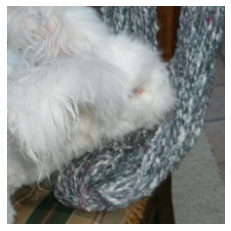

In [13]:
#Perform prediction:
pred = td_model(images)
i=8
plt.imshow(or_images[i])
plt.axis('off')
print(imnet_id_to_name[int(torch.argmax(pred[i]))]) #see predicted category

t1 wool.n.01
t2 angora.n.03


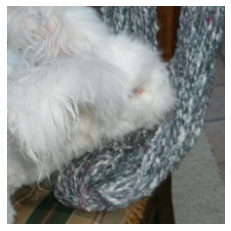

In [14]:
#Perform predictions over time/computation steps:
td_model.output_over_t=True
pred = td_model(images)
i=8
plt.imshow(or_images[i])
plt.axis('off')
print("t1", imnet_id_to_name[int(torch.argmax(pred[0][i]))]) 
print("t2", imnet_id_to_name[int(torch.argmax(pred[1][i]))])
#td_model.output_over_t=False

### Visualization of attention maps over time/computation steps 

In [15]:
#To get attention maps over time/computation steps
mod_t_for_layers = ['layer4']
target_layer = 'layer4'

maps_layer4_mod4_t2, pred_td2, pred_td2_probs = get_CAM_map(td_model, images, t=2, mod_t_for_layers=mod_t_for_layers, target_layer=target_layer)
maps_layer4_mod4_t1, pred_td1, pred_td1_probs = get_CAM_map(td_model, images, t=1, mod_t_for_layers=mod_t_for_layers, target_layer=target_layer)

Computation steps for each block of layer layer4:
2
2
2


<ipython-input-11-9cac9b56a867>:49: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


Computation steps for each block of layer layer4:
1
1
1


### Original image

GT: angora.n.03
T1: wool.n.01
T2: angora.n.03



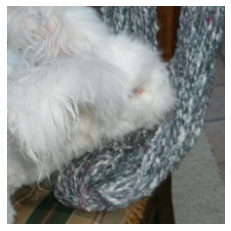

In [16]:
i = 8
plt.imshow(or_images[i])
plt.axis('off')
z = xlabel("Original image")
print("GT: {}\nT1: {}\nT2: {}\n".format(imnet_id_to_name[target[i].item()], imnet_id_to_name[pred_td1[i][0].item()], imnet_id_to_name[pred_td2[i][0].item()]))

### T1 out

'wool.n.01'

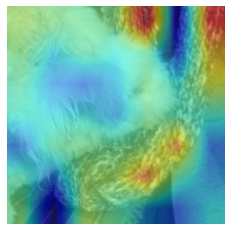

In [17]:
plt.imshow(or_images[i])
plt.imshow(cv2.resize(maps_layer4_mod4_t1[i], (224,224)), alpha=0.5, cmap='jet');
plt.axis('off')
imnet_id_to_name[pred_td1[i][0].item()]

## T2 out

'angora.n.03'

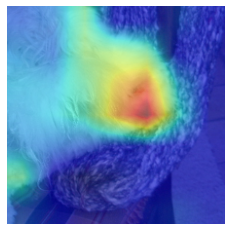

In [18]:
plt.imshow(or_images[i])
plt.imshow(cv2.resize(maps_layer4_mod4_t2[i], (224,224)), alpha=0.5, cmap='jet');
plt.axis('off')
imnet_id_to_name[pred_td2[i][0].item()]

### Original image

GT: partridge.n.03
T1: partridge.n.03
T2: partridge.n.03



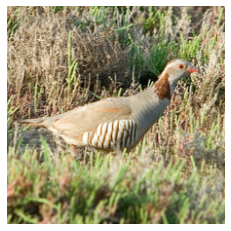

In [19]:
i = 48
plt.imshow(or_images[i])
plt.axis('off')
z = xlabel("Original image")
print("GT: {}\nT1: {}\nT2: {}\n".format(imnet_id_to_name[target[i].item()], imnet_id_to_name[pred_td1[i][0].item()], imnet_id_to_name[pred_td2[i][0].item()]))

### T1 out

'partridge.n.03'

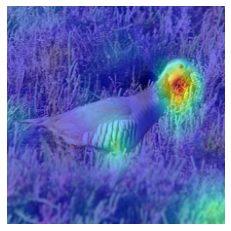

In [20]:
plt.imshow(or_images[i])
plt.imshow(cv2.resize(maps_layer4_mod4_t1[i], (224,224)), alpha=0.5, cmap='jet');
plt.axis('off')
imnet_id_to_name[pred_td1[i][0].item()]

## T2 out

'partridge.n.03'

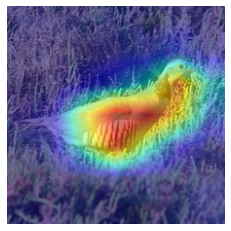

In [21]:
plt.imshow(or_images[i])
plt.imshow(cv2.resize(maps_layer4_mod4_t2[i], (224,224)), alpha=0.5, cmap='jet');
plt.axis('off')
imnet_id_to_name[pred_td2[i][0].item()]

### Original image

GT: strainer.n.01
T1: hook.n.04
T2: corkscrew.n.01



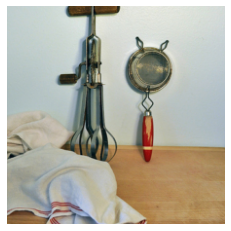

In [22]:
i = 18
plt.imshow(or_images[i])
plt.axis('off')
z = xlabel("Original image")
print("GT: {}\nT1: {}\nT2: {}\n".format(imnet_id_to_name[target[i].item()], imnet_id_to_name[pred_td1[i][0].item()], imnet_id_to_name[pred_td2[i][0].item()]))

### T1 out

'hook.n.04'

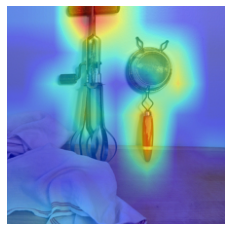

In [23]:
plt.imshow(or_images[i])
plt.imshow(cv2.resize(maps_layer4_mod4_t1[i], (224,224)), alpha=0.5, cmap='jet');
plt.axis('off')
imnet_id_to_name[pred_td1[i][0].item()]

## T2 out

'corkscrew.n.01'

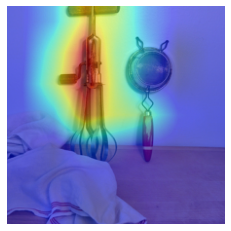

In [24]:
plt.imshow(or_images[i])
plt.imshow(cv2.resize(maps_layer4_mod4_t2[i], (224,224)), alpha=0.5, cmap='jet');
plt.axis('off')
imnet_id_to_name[pred_td2[i][0].item()]

### Original image

GT: collie.n.01
T1: collie.n.01
T2: collie.n.01



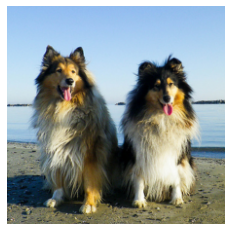

In [25]:
i = 50
plt.imshow(or_images[i])
plt.axis('off')
z = xlabel("Original image")
print("GT: {}\nT1: {}\nT2: {}\n".format(imnet_id_to_name[target[i].item()], imnet_id_to_name[pred_td1[i][0].item()], imnet_id_to_name[pred_td2[i][0].item()]))

### T1 out

'collie.n.01'

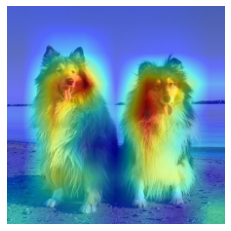

In [26]:
plt.imshow(or_images[i])
plt.imshow(cv2.resize(maps_layer4_mod4_t1[i], (224,224)), alpha=0.5, cmap='jet');
plt.axis('off')
imnet_id_to_name[pred_td1[i][0].item()]

## T2 out

'collie.n.01'

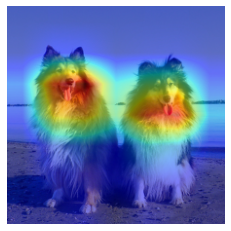

In [27]:
plt.imshow(or_images[i])
plt.imshow(cv2.resize(maps_layer4_mod4_t2[i], (224,224)), alpha=0.5, cmap='jet');
plt.axis('off')
imnet_id_to_name[pred_td2[i][0].item()]

### Original image

GT: modem.n.01
T1: projector.n.02
T2: modem.n.01



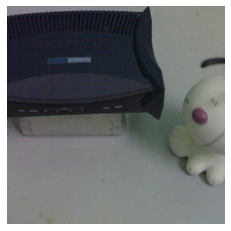

In [28]:
i = 56
plt.imshow(or_images[i])
plt.axis('off')
z = xlabel("Original image")
print("GT: {}\nT1: {}\nT2: {}\n".format(imnet_id_to_name[target[i].item()], imnet_id_to_name[pred_td1[i][0].item()], imnet_id_to_name[pred_td2[i][0].item()]))

### T1 out

'projector.n.02'

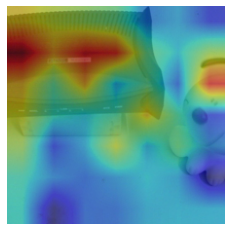

In [29]:
plt.imshow(or_images[i])
plt.imshow(cv2.resize(maps_layer4_mod4_t1[i], (224,224)), alpha=0.5, cmap='jet');
plt.axis('off')
imnet_id_to_name[pred_td1[i][0].item()]

## T2 out

'modem.n.01'

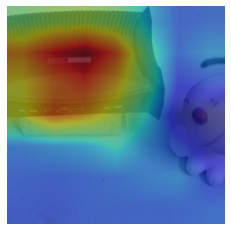

In [30]:
plt.imshow(or_images[i])
plt.imshow(cv2.resize(maps_layer4_mod4_t2[i], (224,224)), alpha=0.5, cmap='jet');
plt.axis('off')
imnet_id_to_name[pred_td2[i][0].item()]